In [1]:
import nltk
from nltk.corpus import gutenberg
import re
import pprint
from nltk import word_tokenize
from urllib.request import urlopen

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hamlet = gutenberg.words('shakespeare-hamlet.txt')
macbeth = gutenberg.words('shakespeare-macbeth.txt')
caesar = gutenberg.words('shakespeare-caesar.txt')

shakespeare = hamlet + macbeth + caesar
shakespeare_words = [w.lower() for w in shakespeare]
tokens = np.array([w.lower() for w in shakespeare_words])
vocab = set(tokens)

In [3]:
counts = {v: len(tokens[tokens == v]) for v in vocab}

In [4]:
df = pd.DataFrame(index = counts.keys(),
                  columns = ['Count','Rank'],
                  dtype = 'float64')

In [5]:
print(counts)

{'nose': 4, 'tardie': 2, 'metled': 2, 'descends': 2, 'sold': 6, 'fatted': 1, 'woe': 12, 'color': 1, 'torch': 4, 'curd': 1, 'fogge': 1, 'apparell': 1, 'confessing': 1, 'stinglesse': 1, 'dirge': 1, 'wittenberg': 3, 'dole': 1, 'herod': 1, 'congregation': 1, 'giuing': 6, 'hence': 28, 'woo': 4, 'enuious': 3, 'pent': 1, 'commons': 2, 'farwel': 1, 'scoene': 2, 'faculty': 2, 'pitch': 1, 'workman': 1, 'man': 139, 'sweltred': 1, 'bakers': 1, 'cling': 2, 'frowningly': 1, 'ranke': 9, 'maids': 3, 'warmes': 1, 'sauory': 1, 'crowing': 1, 'receyu': 1, 'claime': 1, 'fain': 1, 'gouts': 1, 'conquests': 1, 'burneth': 1, 'protests': 1, 'calamity': 1, 'suruiuer': 1, 'buyer': 1, 'began': 4, 'monsters': 2, 'wrapt': 1, 'lome': 2, 'rewards': 2, 'mainly': 1, 'beteene': 1, 'floud': 1, 'chimney': 1, 'causes': 4, 'sweaty': 1, 'rowze': 1, 'promontory': 1, 'subiect': 6, 'watchmen': 1, 'knowledge': 4, 'laine': 1, 'gospell': 1, 'birds': 5, 'con': 1, 'expresse': 3, 'adheres': 1, 'cracke': 2, 'walkt': 2, 'dotes': 1, 'cen

In [6]:
for a in df.index:
    df.loc[a,'Count'] = counts[a]
df['Rank'] = df['Count'].rank(method = 'min', ascending = False)


In [7]:
x = np.log(df['Rank'])
y = np.log(df['Count'])

fit = np.polyfit(x, y, deg = 1)
fitted = fit[0] * x + fit[1]
print('Estimate of s is:\n{0}'.format(fit[0],3))

Estimate of s is:
-1.3597990723258082


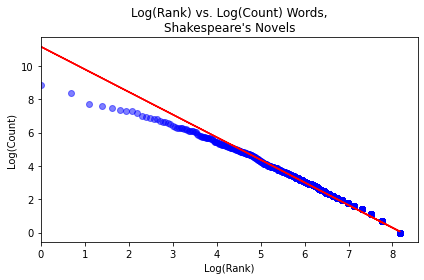

In [8]:
fig = plt.Figure(figsize = (4,4), facecolor = 'w', edgecolor = 'w')
ax = plt.subplot(111)

ax.plot(x, y, 'bo', alpha = 0.5)
ax.plot(x,fitted,'r')

ax.set_title('Log(Rank) vs. Log(Count) Words,\nShakespeare\'s Novels')
ax.set_xlabel('Log(Rank)')
ax.set_ylabel('Log(Count)')

ax.set_xlim(left = max([min(np.log(df['Rank'])) * 0.95,0]))

plt.tight_layout()
plt.show()

In [9]:
print(df.sort_values(by=['Count'], ascending=False))

          Count    Rank
,        7058.0     1.0
.        4417.0     2.0
the      2222.0     3.0
and      2036.0     4.0
'        1750.0     5.0
...         ...     ...
dislike     1.0  3514.0
mirrour     1.0  3514.0
arrest      1.0  3514.0
iouiall     1.0  3514.0
peebles     1.0  3514.0

[7562 rows x 2 columns]


In [10]:
#trying with another text corpus
filePath = "https://archive.org/stream/AnneFrankTheDiaryOfAYoungGirl_201606/Anne-Frank-The-Diary-Of-A-Young-Girl_djvu.txt"
response = urlopen(filePath)
html = response.read()


In [11]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html)
text = soup.get_text()
print(text)




Full text of "Anne Frank The Diary Of A Young Girl"




























Skip to main content




See what's new with book lending at the Internet Archive









 





Internet Archive logo
A line drawing of the Internet Archive headquarters building façade.















Search icon
An illustration of a magnifying glass.









Search icon
An illustration of a magnifying glass.







Upload icon
An illustration of a horizontal line over an up pointing arrow.


Upload






User icon
An illustration of a person's head and chest.




Sign up
          |
          Log in












Web icon
An illustration of a computer application window



Wayback Machine







Texts icon
An illustration of an open book.



Books







Video icon
An illustration of two cells of a film strip.



Video







Audio icon
An illustration of an audio speaker.








Audio







Software icon
An illustration of a 3.5" floppy disk.



Software







Images icon
An illustration of two ph

In [12]:
start = text.find('THE DIARY OF A YOUNG GIRL : THE DEFINITIVE EDITION')
end = text.rfind('(c) 1991 by The Anne Frank— Fonds, Basel, Switzerland (www.annefrank.com)')
diary_text = text[start:end]
print(diary_text)

THE DIARY OF A YOUNG GIRL : THE DEFINITIVE EDITION 


Anne Frank 

Edited by Otto H. Frank and Mirjam Pressler 
Translated by Susan Massotty 


BOOK FLAP 

Anne Frank's The Diary of a Young Girl is among the most enduring documents of the 
twentieth century. Since its publication in 1947, it has been read by tens of millions 
of people all over the world. It remains a beloved and deeply admired testament to the 
indestructable nature of the human spirit. 

Restore in this Definitive Edition are diary entries that had been omitted from the 
original edition. These passages, which constitute 30 percent more material, reinforce 
the fact that Anne was first and foremost a teenage girl, not a remote and flawless 
symbol. She fretted about, and tried to copie with, her own emerging sexuality. Like 
many young girls, she often found herself in disagreement with her mother. And like 
any teenager, she veered between the carefree nature of a child and the full-fledged 
sorrow of an adult. Anne

In [13]:
tokens = np.array([w.lower() for w in word_tokenize(diary_text)])
vocab = set(tokens)

In [14]:
counts = {v: len(tokens[tokens == v]) for v in vocab}
df = pd.DataFrame(index = counts.keys(),
                  columns = ['Count','Rank'],
                  dtype = 'float64')

In [15]:
for a in df.index:
    df.loc[a,'Count'] = counts[a]
df['Rank'] = df['Count'].rank(method = 'min', ascending = False)

In [16]:
print(df.sort_values(by=['Count'], ascending=False))

                 Count    Rank
,               7472.0     1.0
.               5735.0     2.0
the             4504.0     3.0
i               3463.0     4.0
and             3202.0     5.0
...                ...     ...
detestable         1.0  4365.0
hurtful            1.0  4365.0
tongue-lashing     1.0  4365.0
cassino            1.0  4365.0
silliest           1.0  4365.0

[8574 rows x 2 columns]


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

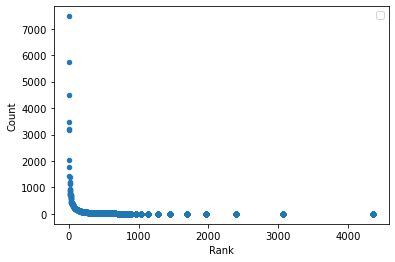

In [17]:
plt.figure(); df.plot.scatter(x='Rank', y='Count'); plt.legend(loc='best')